__Ver enunciado en Classroom → Examenes__:

Los siguientes datos fueron extraidos de los datos para la cuarta ola de infecciones por millon de  habitantes (IPMH) de Colombia por la variante Omicrón del Coronavirus

A) Genere un data frame de pandas y agregé una nueva columna de IPMH con una incertidubre del 2 por mil aleatoria. Es decir, a cada IPMH sumarle o restarle un número aleatorio en el rango de su 2 por mil.

B) Interprete los datos como un problema de caida libre y a partir del ajuste (fit) a la correspondiente ecuación de movimiento, determine (para la columna con incertidumbre)
1. La velocidad inicial de IPMH  en `IPMH/día`
1. La aceleración constante en `IPMH/día**2`
1. El número máximo de IPMH que se alcanzaría
1. El número de días en el que se alcanzaría dicho máximo
1. Realice una gráfico que muestré el ajuste y la posición del máximo usando los estándares adecuados

DATOS
```python  
[
    {'día':1,'IPMH':464},
    {'día':2,'IPMH':494},
    {'día':3,'IPMH':532},
    {'día':4,'IPMH':552},
    {'día':5,'IPMH':576},
    {'día':6,'IPMH':589}
]
```

In [19]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
import numpy as np

In [2]:
df=pd.DataFrame([
    {'día':1,'IPMH':464},
    {'día':2,'IPMH':494},
    {'día':3,'IPMH':532},
    {'día':4,'IPMH':552},
    {'día':5,'IPMH':576},
    {'día':6,'IPMH':589}
   ])
df

,día,IPMH
0,1,464
1,2,494
2,3,532
3,4,552
4,5,576
5,6,589


In [9]:
df['IPMHr']=df['IPMH']+np.random.uniform(-0.002,0.002,df.shape[0])

In [10]:
df

,día,IPMH,IPMHr
0,1,464,464.000586
1,2,494,494.001162
2,3,532,531.998096
3,4,552,551.998534
4,5,576,576.001506
5,6,589,588.998647


In [13]:
c=np.polyfit(df['día'],df['IPMHr'],2)

In [17]:
I=np.poly1d(c,variable='t')
print(I)

        2
-2.518 t + 43.08 t + 421.9


$$ I(t)=\frac12 a t^2+v_0 t +I_0 $$

In [51]:
print(f'velocidad inicial: v_0= {round(c[1],2)}  IPMH/día')

velocidad inicial: v_0= 43.08  IPMH/día


In [53]:
print(f'aceleración: a={round(c[0],2)*2} IPMH/día²')

aceleración: a=-5.04 IPMH/día²


In [35]:
tmax=I.deriv().roots[0]

In [55]:
print(f'Máximo de infectados {round(I(tmax),1)} en {round(tmax,2)} días')

Máximo de infectados 606.2 en 8.56 días


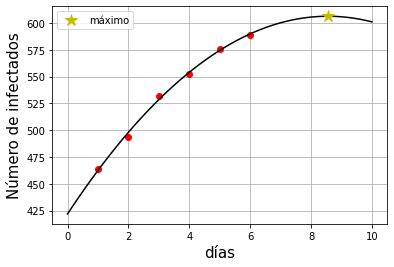

In [42]:
t=np.linspace(df['día'].min()-1,df['día'].max()+4)
plt.plot(df['día'],df['IPMHr'],'ro')
plt.plot(t,I(t),'k-')
plt.plot(tmax,I(tmax),'y*',markersize=12,label='máximo')
plt.grid()
plt.xlabel('días',size=15)
plt.ylabel('Número de infectados',size=15)
plt.legend()